#Assignment 1-Laura Escobar Crespo 

###**First graded practice**

You have to return a clear and detailed explanation on how did you solve the problem and the solution (I strongly suggest notebooks) plus the codes you used and how to use them.

**Exercise 1:** Newtons method can be used without modifications to find complex roots of functions, you only have to give a complex starting point (x+yj in Python). 
You know that polynomials have as many roots as the degree of the polynomial, and the Newton's method will converge to a different one depending on the starting point. If you plot in different colors the starting points depending on which root does the Newton's method find, you will have a plot of the "basins of attraction" of the different roots.
Use your Newton's method function to find the basins of attraction of the polynomial $z^4+1$ with starting points in the set $\left\{z=x+yi / x\in [-5,5], y\in [-2.5,2.5]\right\}$.

**Notes:** 
- You need to define a grid of starting points and run the Newton's method for each of them. 

- The grid should be fine enough to appreciate the fractals you should get.

- Try with grids with the same number of points defined in smaller domains included in the original.

# Explanation of Exercise 1
First of all, we define two arrays for x and y taking in care the domains given in the exercise. We also create a list of matrices of coordinates of the two vectors and the complex number.
After defiying the given function and its derivative we create the Newton Method. Knowing that; 
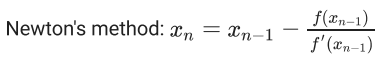

For our function we have to take in care the maximum number of repetitions (or iterations), the "precision" (a value close to 0) and the value of x (in each itarion).
We set the number os iterations at zero at first. It will change when we sum an iteration. The funtion will be carried out as long as the number of iteration is not larger than the maximum number of iterations and the precision is smaller than "the error" (the absolute value of the function in x we are calculating). Then is just following the expression of above. It ends when we reach the maximum number of iterations.
For ploting we create a double loop (as we have a real and imaginary part). The way of choosing a point as an "origin" (to draw the plot with diferent conditions) is searching unique values.
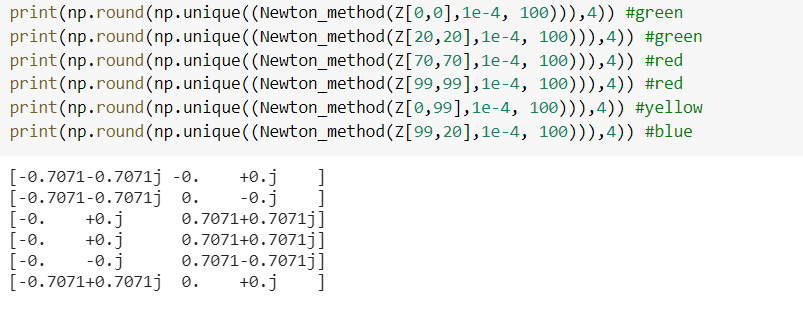

Note: The i and j chosen in *print(np.round(np.unique((Newton_method(Z[i,j],1e-4, 100))),4))* is absolutly random. It is just to prove why I chosed that points.

Then we ensure that the two coordinates have the given domain and we plot our method as a fractal.
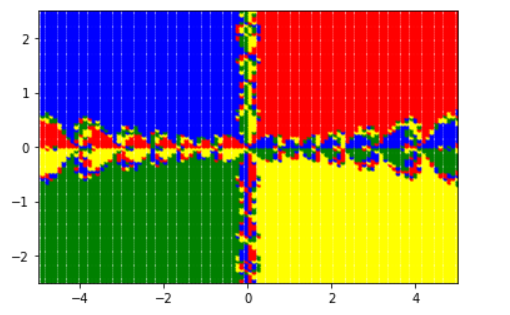

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#we define the domain for x and y
X = np.linspace(-5,5,100)
Y = np.linspace(-2.5,2.5,100)
X,Y = np.meshgrid(X,Y) 
Z = X + Y*1j

def Function(z):
   return  z**4 + 1

def D_function(z): #This is the derivative of the given function
   return 4*z**3

def Newton_method(x_0, precision, n_max):
  n = 0 #Number of repetitions/iterations
  x_n = x_0 #x_n = x_k+1

  error = abs(Function(x_n)) #Value we want close to 0

  while error > precision and n < n_max:

     if D_function(x_n) == 0: #The derivative is zero. We can not find a solution
            return None
     else:
            x_n = x_n - np.array(Function(x_n))/np.array(D_function(x_n))
            n += 1
            error = abs(Function(x_n))
           
  if n==n_max: #We have reached the maximum number of repetitions/iterations
    return None
 
  return x_n, Function(x_n)

for i in range(1,len(Z)): 
  for j in range(1,len(Z)):    
    y = Newton_method(Z[i,j],1e-4, 100) 
    y = np.round(y,4) #round four decimals
    
    r = Z[i,j].real 
    im = Z[i,j].imag

    if y[0]==- 0.7071 - 0.7071j : 
      plt.scatter(r ,im , c = "green", s = 10,linewidth = 1)

    if y[0]==0.7071 + 0.7071j :
      plt.scatter(r ,im , c = "red", s = 10,linewidth = 1)

    if y[0]==0.7071 - 0.7071j :
      plt.scatter(r ,im , c = "yellow", s = 10,linewidth = 1)

    if y[0]==- 0.7071 + 0.7071j :
      plt.scatter(r ,im , c = "blue", s = 10,linewidth = 1)

#we define the range to plot
plt.xlim(-5,5) 
plt.ylim(-2.5, 2.5) 
plt.show()

Try with grids with the same number of points defined in smaller domains included in the original.

We just have to repeat the same code but at the moment of plotting, we just change the range of x and y. Here it is shown two examples:
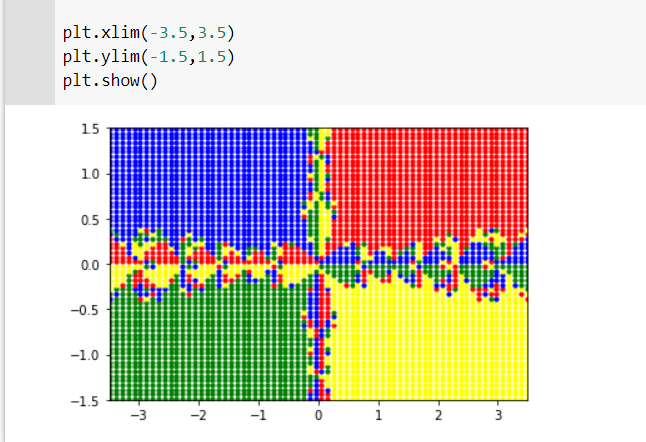

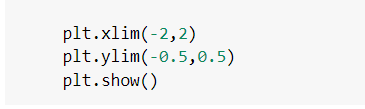

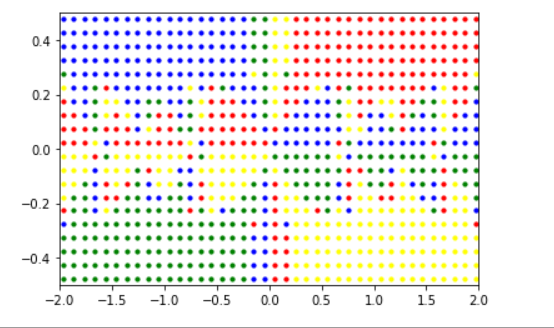

As we can observe, if we reduced the domain it just zoom the original plot.



**Exercise 2:** We know the spectrum of four substances, water, fat, oxi-haemoglobine and deoxi-haemoglobine, plus another spectrum which appears in tissues corresponding to tumors. 

In the file 'data.npy' you can find the spectra of these substances plus the spectra of two tissues.

Use an **optimization method** (anyone, as long as it is yours) to find out which one of the tissues corresponds with a tumor.

To upload the data:

1. Save the file data.npy to your drive.

2. As you are reading this I guess you have opened the practice, so mount your Drive:

On the left up corner of Google colab go to "Archivos"

![Quad error estimation](https://drive.google.com/uc?id=10l3zFcp5lLR_00Y9Jig9W4e8v_BqvNOz)

and click on the circled icon to connect to the drive:

![Quad error estimation](https://drive.google.com/uc?id=1OuQrswK5knKC9eT0hT95YZiDDejeePQS)

3.   Use 

'with open('drive/MyDrive/...yourpath.../data.npy', 'rb') as f: <br>
>    water   = np.load(f) <br>
>    fat     = np.load(f) <br>
>    oxih    = np.load(f) <br>
>    deoxih  = np.load(f) <br>
>    stc     = np.load(f) <br>
>    tissue1 = np.load(f) <br>
>    tissue2 = np.load(f)' <br>

to load the data.



#Explanation of Exercise 2
In this exercise I have used the Gradient Descendent that uses optimization to find a local minimum.
First of all, after uploading the given data, we inizialate the coefficients x1, x2, x3, x4 and x5 as well as the "precision" which is a number close to 0.
To calculate the coefficients, we use four *for* loops that all iterates 51 times (it is the lenght of all the vectors of the given data). 
To calculate the value of the coefficients is important to compute the gradient (which is the derivatives of, in this case the noise/error cost, with respect each variable). In that way, we will end calculating five derivatives as we have five coefficients to calculate.

*Note:* The error is, actually, not important for the calculation of the coefficients. We can delete them from the code and the solution will not change. We have only to take in care to define the derivatives.

Then we calculate the cost for each variable and number and we add it to itself in each iteration. After that we update the coeffients for each iteration taking in care the precision and the cost calculated.
At the end, we find that for tissue1, the coefficients are:
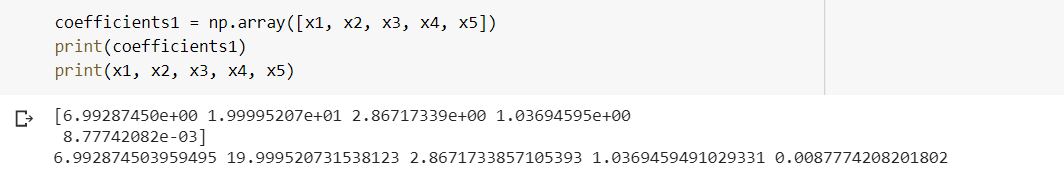
while for tissue2:
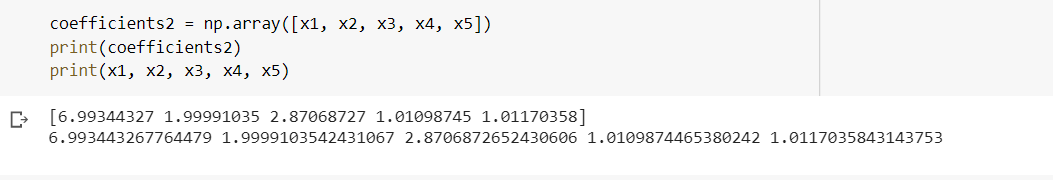

To be able to know which of them have cancer we have to focus in the last coefficent, x5, which is the spectrum that tell us if there is cancer or not. Clearly, tissue2 is the one that has cancer has tissue1 has as x5 a number very close to 0.

Note: Respect with the error/noise is just interesting to see that it decreases so fast in this code (I try with 100 iterations/repetitions and I get a very similar coefficients as result. I decided to keep it as 1000 iterations because the error was smaller (although there were not much differnce)).
The error for tissue1:
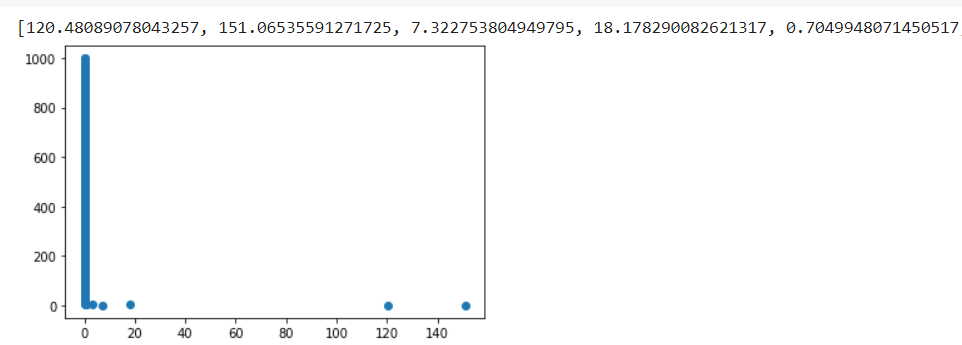

and the error for tissue2:
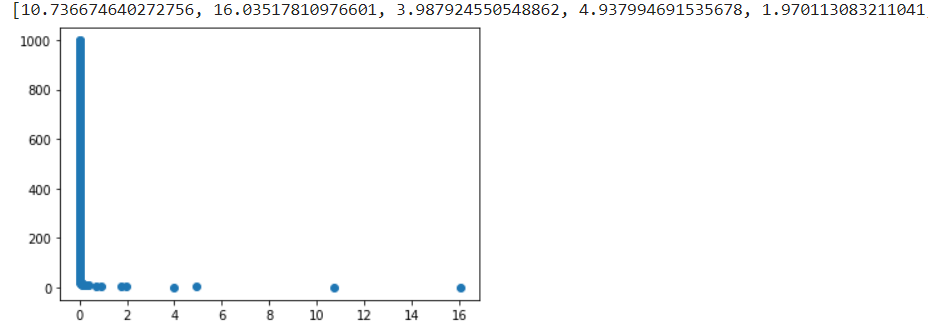

We see that for both the error decreases very fast to close to zero, however if we print it, we see that it still decreses to closer to zero in each iteration.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as p

with open('/content/drive/My Drive/Metodos/data.npy', 'rb') as f:
  water = np.load(f)
  fat = np.load(f)
  oxih = np.load(f)
  deoxih = np.load(f)
  stc = np.load(f)
  tissue1 = np.load(f)
  tissue2 = np.load(f)
#all have length 51

In [ ]:
import sympy
#we initialize the parameters 
x1 = 1
x2 = 1
x3 = 1
x4 = 1
x5 = 1

precision = 1e-4 #value close to 0 
noise = []
n = 1000 #number of repetitions/iterations

for r in range(n):
  noise_cost = 0
  w = 0
  f = 0
  o = 0
  d = 0
  s = 0
  
  for i in range(51):
    y = x1*water[i]+x2*fat[i]+x3*oxih[i]+x4*deoxih[i]+x5*stc[i]
    noise_cost+=(tissue1[i]-y)**2 #SSE

    for j in range(51): #we compute the derivatives (gradient)
      dx1 = (-2*water[j])*(tissue1[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      dx2 = (-2*fat[j])*(tissue1[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      dx3 = (-2*oxih[j])*(tissue1[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      dx4 = (-2*deoxih[j])*(tissue1[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      dx5 = (-2*stc[j])*(tissue1[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      #cost calculation and the update it for each iteration
      w = w + dx1
      f = f + dx2
      o = o + dx3
      d = d + dx4
      s = s + dx5
     
    x1 = x1-precision*w
    x2 = x2-precision*f
    x3 = x3-precision*o
    x4 = x4-precision*d
    x5 = x5-precision*s
   
  noise.append(noise_cost)

coefficients1 = np.array([x1, x2, x3, x4, x5])
print(coefficients1)
print(x1, x2, x3, x4, x5)

In [ ]:
import matplotlib.pyplot as plt
print(noise)
m = np.arange(0,1000,1) 
plt.scatter(noise,m)
plt.show()

In [ ]:
#we repeat the same for tissue2
x1 = 1
x2 = 1
x3 = 1
x4 = 1
x5 = 1

precision = 1e-4  
noise = []
n = 1000 #number of repetitions/iterations

for r in range(n):
  noise_cost = 0
  w = 0
  f = 0
  o = 0
  d = 0
  s = 0
  
  for i in range(51):
    y = x1*water[i]+x2*fat[i]+x3*oxih[i]+x4*deoxih[i]+x5*stc[i]
    noise_cost+=(tissue2[i]-y)**2

    for j in range(51):
      dx1 = (-2*water[j])*(tissue2[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      dx2 = (-2*fat[j])*(tissue2[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      dx3 = (-2*oxih[j])*(tissue2[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      dx4 = (-2*deoxih[j])*(tissue2[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      dx5 = (-2*stc[j])*(tissue2[j]-(x1*water[j]+x2*fat[j]+x3*oxih[j]+x4*deoxih[j]+x5*stc[j]))
      w = w + dx1
      f = f + dx2
      o = o + dx3
      d = d + dx4
      s = s + dx5
     
    x1 = x1-precision*w
    x2 = x2-precision*f
    x3 = x3-precision*o
    x4 = x4-precision*d
    x5 = x5-precision*s
   
  noise.append(noise_cost)

coefficients2 = np.array([x1, x2, x3, x4, x5])
print(coefficients2)
print(x1, x2, x3, x4, x5)

In [ ]:
import matplotlib.pyplot as plt
print(noise)
m = np.arange(0,1000,1) 
plt.scatter(noise,m)
plt.show()